In [18]:
### import libraries


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',None)

In [19]:
# Load the Big Game Census data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")
big_game_data.head()

,Unnamed: 0,Player Name,Player Jersey Number,Player Position,Player Age,Player Weight (lbs.),Years Played,"Player Birthplace (city, town, etc.)",Player Birth State,Player Birthplace (Combo),Player College,Player Team,Conference,2016 Population Estimates (except where otherwise noted),State GEO ID,Full GEOID,Latitude (player birthplace),Longitude (player birthplace),Number from City,Number of Records,American FactFinder Link for more Census data points,Quickfacts Link,State Data Link,Source (Population States 2017),"Birthplace, Population Data Source"
0,0,Devin McCourty,#32,S/FS,30,195,8,Nanuet,New York,"Nanuet, New York",Rutgers,New England,AFC,18377,36,0400000US36,41.088707,-74.013473,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/N...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
1,1,Danny Amendola,#80,PR/WR/KR,32,190,9,The Woodlands,Texas,"The Woodlands, Texas",Texas Tech,New England,AFC,108373,48,0400000US48,30.173419,-95.504686,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/T...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
2,2,Johnson Bademosi,#29,CB/SPTM/RCB,27,206,6,Silver Spring,Maryland,"Silver Spring, Maryland",Stanford,New England,AFC,78038,24,0400000US24,38.990666,-77.026088,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/S...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
3,3,Chris Hogan,#15,WR,29,210,5,Wyckoff,New Jersey,"Wyckoff, New Jersey",Monmouth,New England,AFC,17119,34,0400000US34,41.009542,-74.172922,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/W...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
4,4,James Develin,#46,RB/FB,29,255,5,Gilbertsville,Pennsylvania,"Gilbertsville, Pennsylvania",Brown,New England,AFC,5084,42,0400000US42,40.320097,-75.610184,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/G...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."


## How does the distribution of player birthplaces compare between the two teams

In [20]:
# Group by 'Player Team' and 'Player Birth State', and count players
team_birthplace_distribution = big_game_data.groupby(['Player Team', 'Player Birth State']).size().reset_index(name='Player Count')

In [21]:
# Pivot the data to compare teams side by side
team_birthplace_comparison = team_birthplace_distribution.pivot(index='Player Birth State', columns='Player Team', values='Player Count').fillna(0)

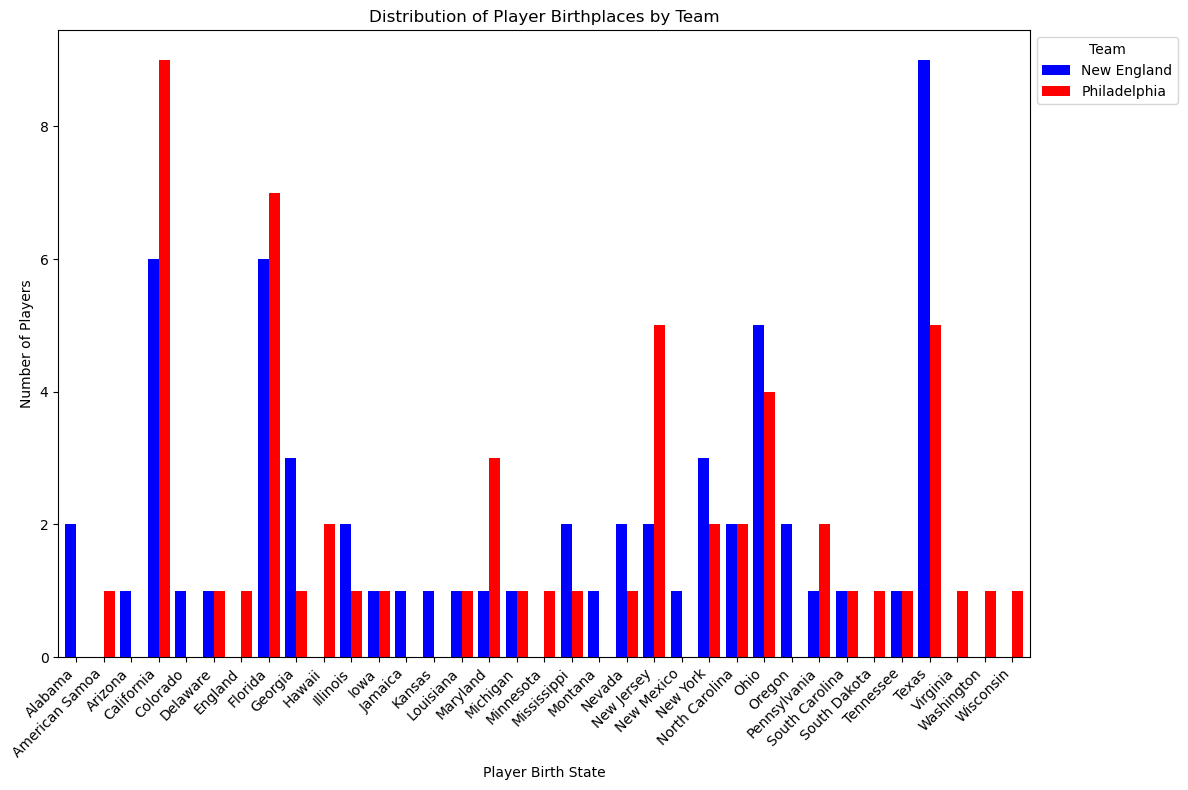

In [22]:
# Plot the distributions as a side-by-side bar chart
team_birthplace_comparison.plot(kind='bar', figsize=(12, 8), width=0.8, color=['blue', 'red'])
plt.xlabel('Player Birth State')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Birthplaces by Team')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Team', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [23]:
print(team_birthplace_comparison)

Player Team         New England  Philadelphia
Player Birth State                           
Alabama                     2.0           0.0
American Samoa              0.0           1.0
Arizona                     1.0           0.0
California                  6.0           9.0
Colorado                    1.0           0.0
Delaware                    1.0           1.0
England                     0.0           1.0
Florida                     6.0           7.0
Georgia                     3.0           1.0
Hawaii                      0.0           2.0
Illinois                    2.0           1.0
Iowa                        1.0           1.0
Jamaica                     1.0           0.0
Kansas                      1.0           0.0
Louisiana                   1.0           1.0
Maryland                    1.0           3.0
Michigan                    1.0           1.0
Minnesota                   0.0           1.0
Mississippi                 2.0           1.0
Montana                     1.0   

## Do certain states favor one team over the other in terms of player representation


In [24]:
# Load the Big Game Census data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")
big_game_data.head()

,Unnamed: 0,Player Name,Player Jersey Number,Player Position,Player Age,Player Weight (lbs.),Years Played,"Player Birthplace (city, town, etc.)",Player Birth State,Player Birthplace (Combo),Player College,Player Team,Conference,2016 Population Estimates (except where otherwise noted),State GEO ID,Full GEOID,Latitude (player birthplace),Longitude (player birthplace),Number from City,Number of Records,American FactFinder Link for more Census data points,Quickfacts Link,State Data Link,Source (Population States 2017),"Birthplace, Population Data Source"
0,0,Devin McCourty,#32,S/FS,30,195,8,Nanuet,New York,"Nanuet, New York",Rutgers,New England,AFC,18377,36,0400000US36,41.088707,-74.013473,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/N...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
1,1,Danny Amendola,#80,PR/WR/KR,32,190,9,The Woodlands,Texas,"The Woodlands, Texas",Texas Tech,New England,AFC,108373,48,0400000US48,30.173419,-95.504686,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/T...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
2,2,Johnson Bademosi,#29,CB/SPTM/RCB,27,206,6,Silver Spring,Maryland,"Silver Spring, Maryland",Stanford,New England,AFC,78038,24,0400000US24,38.990666,-77.026088,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/S...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
3,3,Chris Hogan,#15,WR,29,210,5,Wyckoff,New Jersey,"Wyckoff, New Jersey",Monmouth,New England,AFC,17119,34,0400000US34,41.009542,-74.172922,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/W...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."
4,4,James Develin,#46,RB/FB,29,255,5,Gilbertsville,Pennsylvania,"Gilbertsville, Pennsylvania",Brown,New England,AFC,5084,42,0400000US42,40.320097,-75.610184,1,1,https://factfinder.census.gov/bkmk/cf/1.0/en/p...,https://www.census.gov/quickfacts/fact/table/G...,https://factfinder.census.gov/bkmk/cf/1.0/en/s...,"U.S. Census Bureau, 2017 Annual Estimates of t...","U.S. Census Bureau, 2012-2016 American Communi..."


In [25]:
# Group by 'Player Team' and 'Player Birth State', and count players
team_birthplace_distribution = big_game_data.groupby(['Player Team', 'Player Birth State']).size().reset_index(name='Player Count')

In [26]:
# Pivot the data to compare teams side by side
team_birthplace_comparison = team_birthplace_distribution.pivot(index='Player Birth State', columns='Player Team', values='Player Count').fillna(0)

In [27]:
# Calculate the difference between the two teams' player counts
team_birthplace_comparison['Difference'] = team_birthplace_comparison['New England'] - team_birthplace_comparison['Philadelphia']

In [28]:
# Sort by the absolute difference in player counts
team_birthplace_comparison['Absolute Difference'] = team_birthplace_comparison['Difference'].abs()
sorted_team_birthplace_comparison = team_birthplace_comparison.sort_values(by='Absolute Difference', ascending=False)

In [31]:
sorted_team_birthplace_comparison.head(10)

Player Team,New England,Philadelphia,Difference,Absolute Difference
Player Birth State,,,,
Texas,9.0,5.0,4.0,4.0
California,6.0,9.0,-3.0,3.0
New Jersey,2.0,5.0,-3.0,3.0
Alabama,2.0,0.0,2.0,2.0
Georgia,3.0,1.0,2.0,2.0
Maryland,1.0,3.0,-2.0,2.0
Oregon,2.0,0.0,2.0,2.0
Hawaii,0.0,2.0,-2.0,2.0
Pennsylvania,1.0,2.0,-1.0,1.0


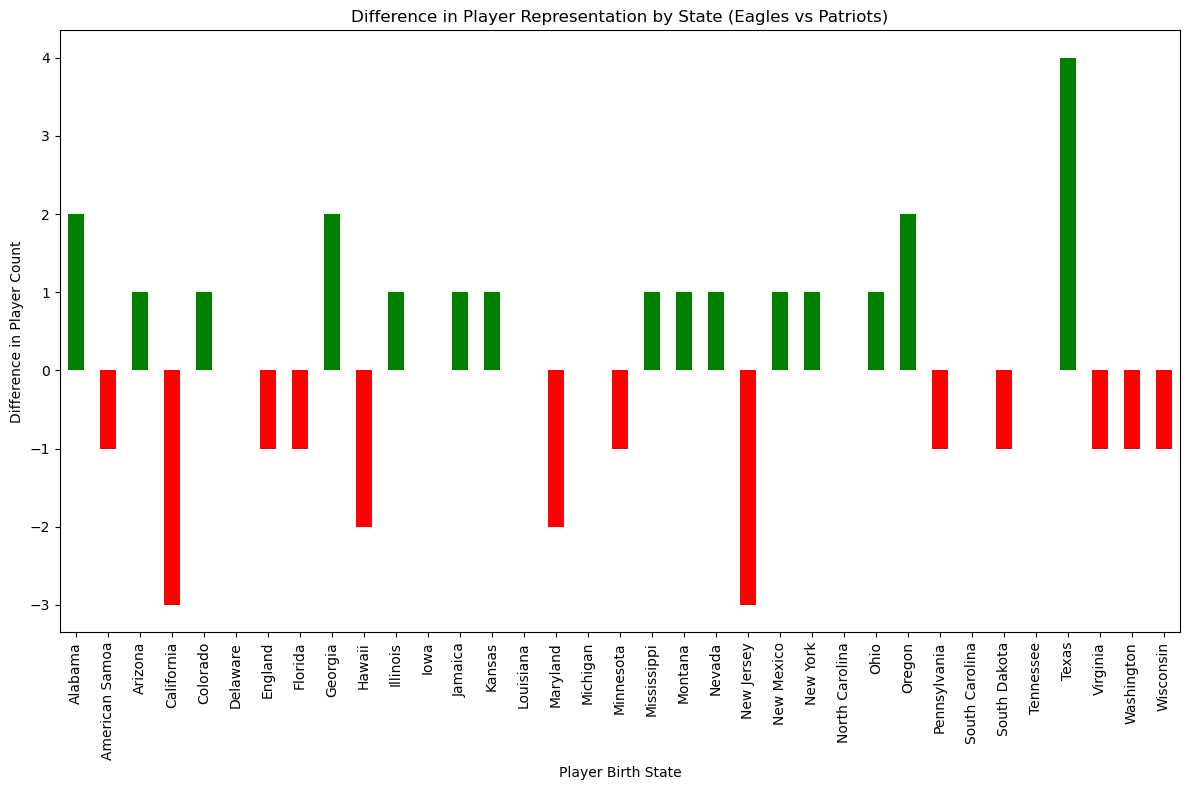

In [32]:
# Plot the difference in player counts
plt.figure(figsize=(12, 8))
team_birthplace_comparison['Difference'].plot(kind='bar', color=['green' if x > 0 else 'red' for x in team_birthplace_comparison['Difference']])
plt.xlabel('Player Birth State')
plt.ylabel('Difference in Player Count')
plt.title('Difference in Player Representation by State (Eagles vs Patriots)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

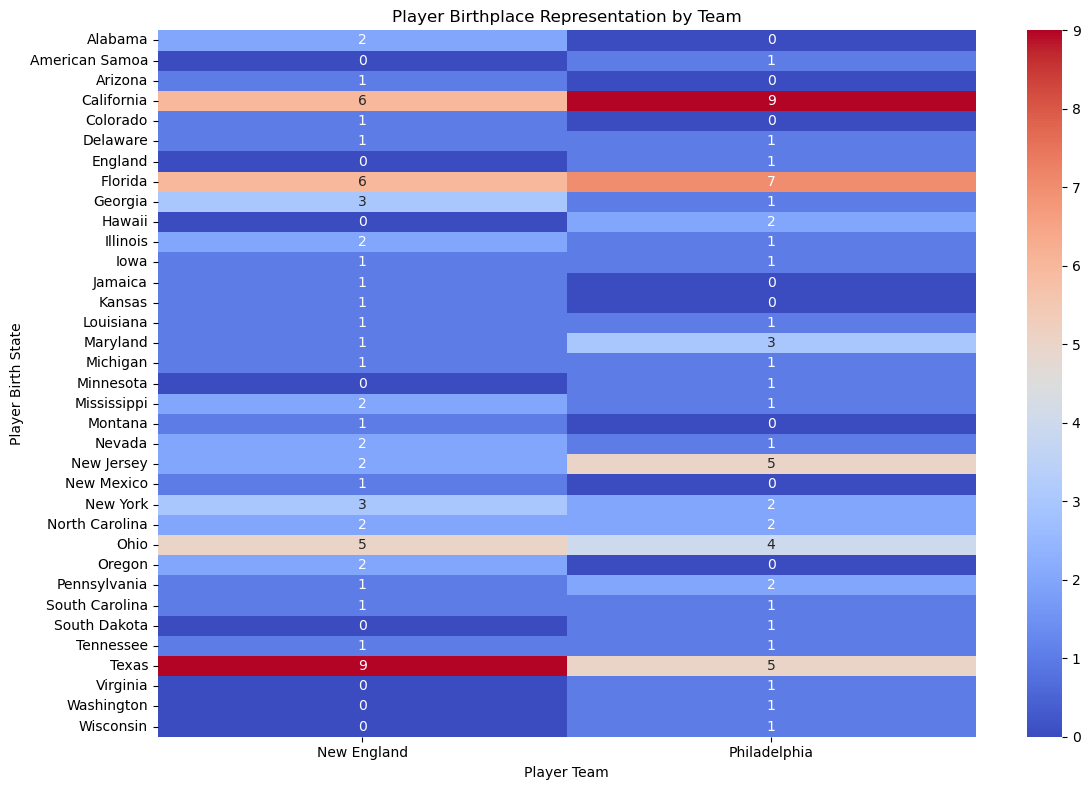

In [43]:

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(team_birthplace_comparison[['New England', 'Philadelphia']], annot=True, cmap="coolwarm")
plt.title('Player Birthplace Representation by Team')
plt.ylabel('Player Birth State')
plt.tight_layout()
plt.show()